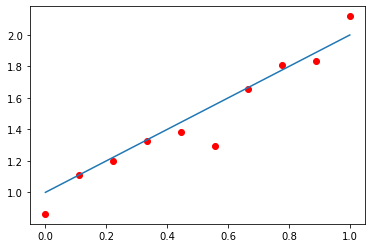

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. create pts
x =  np.linspace(0, 1, 10)

# 2. create beta: y = beta0 + beta1 * x
beta0 = beta1 = 1
beta = [beta0, beta1]

# 3. create target value
t = beta0 + beta1 * x
tnoisy = t + np.random.normal(0, .1, len(x))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

In [2]:
maxIter = 1000
N = len(x)

# Feature Vector = [[1, x0], ..., [1, xn]] ----- 1 is for the beta0
X_tilde = np.hstack((np.ones((len(x),1)) , x.reshape(-1,1)))

# Learning rate
eta = .01

# Learning parameters - beta
learned_beta = np.random.normal(0, 1, (2,))

for _ in range(maxIter):
    tmp_res = tnoisy - np.dot(X_tilde,learned_beta)
    gradient_beta0 = 2/N * np.sum(np.multiply(tmp_res, -X_tilde[:, 0]))
    gradient_beta1 = 2/N * np.sum(np.multiply(tmp_res, -X_tilde[:, 1]))
    grad = np.asarray([gradient_beta0, gradient_beta1])

    learned_beta = learned_beta - eta*grad

print("learned beta is:", learned_beta)

learned beta is: [0.94047839 1.04265135]


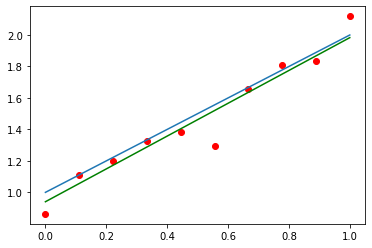

In [3]:
x_prediction = np.linspace(0,1,100)

xprediction_tilde = np.hstack((np.ones((len(x_prediction),1)), \
                    x_prediction.reshape(-1,1)))

prediction = np.dot(xprediction_tilde, learned_beta)

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(x_prediction, prediction, c='g')
plt.show()

(10, 1)


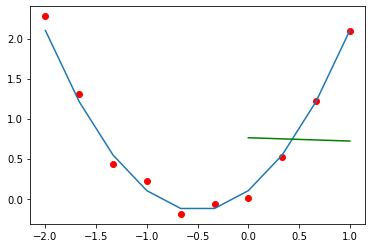

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x.reshape(-1,1), tnoisy.reshape(-1,1))

xprediction = np.linspace(0,1,100)

# estimate prediction from our model on the new set of points
prediction = reg.predict(xprediction.reshape(-1,1))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(xprediction,prediction, c='g')
plt.show()

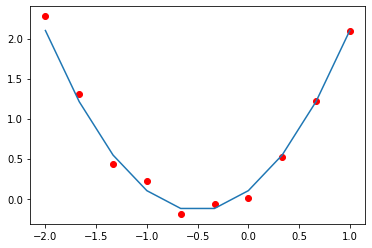

In [5]:
x = np.linspace(-2,1,10)

t = .1 + x + x**2

tnoisy = .1 + x + x**2 + np.random.normal(0,.1,(len(x),))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

learned beat: [0.0726258  0.98940875 1.03397057]


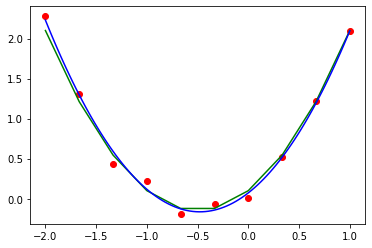

In [6]:
from sklearn.preprocessing import PolynomialFeatures

my_poly = PolynomialFeatures(2)
Xtilde = my_poly.fit_transform(x.reshape(-1,1))

N = len(x)
learned_beta = np.random.normal(0, 1, (3,))

for i in range(1000):
    tmp_res = tnoisy - np.dot(Xtilde, learned_beta)
    grad_beta0 = 2/N * np.sum(np.multiply(tmp_res, -Xtilde[:, 0]))
    grad_beta1 = 2/N * np.sum(np.multiply(tmp_res, -Xtilde[:, 1]))
    grad_beta2 = 2/N * np.sum(np.multiply(tmp_res, -Xtilde[:, 2]))
    grad = np.asarray([grad_beta0, grad_beta1, grad_beta2])

    learned_beta = learned_beta - eta * grad

print("learned beat:", learned_beta)
pred = np.linspace(-2, 1, 100)
pred_tilde = my_poly.fit_transform(pred.reshape(-1, 1))
xpred = np.dot(pred_tilde, learned_beta)

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t, c="g")
plt.plot(pred, xpred, c='b')
plt.show()

In [7]:
pred = reg.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(Xtilde[:, 1], Xtilde[:, 2], tnoisy, c='r')

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
x, y = np.meshgrid(x, y)
eq = learned_beta[0] + learned_beta[1] * x + learned_beta[2] * x**2
print(xpred.shape)
ax.plot_surface(x, y, xpred.reshape(np.shape(y)), alpha=0.2)
plt.show()